In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [104]:
def list_mul_2d(M, m):
    """ M is a list of lists. Multiply each one of them by m."""
    return [[m * x for x in L] for L in M]

def f(h, t, U, extra = 0):  
    v = np.matmul(U, h)
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = 0.5*(np.tanh(v0) - x)
    ydot = 0.5*(np.tanh(v1) - y)
    
    return [xdot, ydot]

def draw_phase_portrait(U, size=1, title_str='Phase portrait'):
    # Create the grid in the domain [-1, 1] x [-1, 1].
    lo, hi = -0.5*size, 0.5*size
    X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = f([X[i, j], Y[i, j]], 0, U)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
    
    plt.title(title_str)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 500, 2000)  
        xs = odeint(f, x_init, times, args = (U, 0))
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 2) # end

In [105]:
def eu_dist(x1, x2):
    """Euclidean distance between points x1 and x2 in R^n."""
    assert len(x1) == len(x2)
    return np.linalg.norm(x1 - x2)

## Example 1

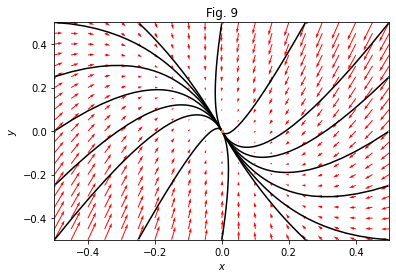

In [106]:
U = np.matrix([[0.1, -0.1],[-1, 0]])
draw_phase_portrait(U, 1, 'Fig. 9')

A small change in where you start may mean a signigicant change in where you reach after $N \rightarrow \infty$ steps. One does not have to wait until infinity, but it is enough consider a sufficiently large number of steps. If the distance between final points is significantly larger than that between the initial points then we can consider the equation to be near a bifurcation point.

In [107]:
x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]
size = 0.01
x_inits = list_mul_2d(x_inits, size)

# This list comprehension is not silly. The first pair of points is x_inits[-1] and x_inits[0]. We need the 
# distance between the first and the last point of this list.
x_init_distances = [eu_dist(np.array(x_inits[i-1]), np.array(x_inits[i])) for i in range(len(x_inits))]

In [108]:
x_finals = []
for x_init in list_mul_2d(x_inits, size):  
    times = np.linspace(0, 500, 2000)  
    xs = odeint(f, x_init, times, args = (U, 0))
    x_finals.append(xs)
        
x_final_distances = [eu_dist(np.array(x_finals[i-1]), np.array(x_finals[i])) for i in range(len(x_finals))]    
print(x_final_distances)

[5.4669263012116895e-05, 7.019336760967647e-05, 7.019804296636984e-05, 7.019219917745927e-05, 7.018857610995239e-05, 5.467216432395104e-05, 5.466444372672597e-05, 5.4668642297620607e-05, 5.46692630121169e-05, 7.019336760967647e-05, 7.019804296636982e-05, 7.019219917745927e-05, 7.018857610995243e-05, 5.4672164323951033e-05, 5.466444372672597e-05, 5.46686422976206e-05]


In [109]:
ratios = [round(x_final_distances[i]/x_init_distances[i], 6) for i in range(len(x_init_distances))]
print(ratios)

[0.021868, 0.028077, 0.028079, 0.028077, 0.028075, 0.021869, 0.021866, 0.021867, 0.021868, 0.028077, 0.028079, 0.028077, 0.028075, 0.021869, 0.021866, 0.021867]


The distances between the initial points were uniformly $0.0025$ but the final points have converged to the origin. This is an example of stability.

## Example 2

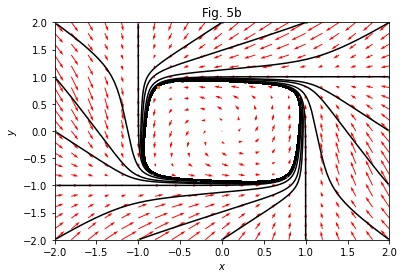

In [115]:
U = np.matrix([[2.4271, -1.7634],[1.7634, 2.4271]])
draw_phase_portrait(U, 4, 'Fig. 5b')

In [116]:
x_finals = []
for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 500, 2000)  
        xs = odeint(f, x_init, times, args = (U, 0))
        x_finals.append(xs)
        
x_final_distances = [eu_dist(np.array(x_finals[i-1]), np.array(x_finals[i])) for i in range(len(x_finals))] 

In [118]:
print(x_final_distances)

[6.318425779162223, 24.55692381352053, 26.44905101469646, 17.990986111862792, 6.318425779162223, 24.55692381352053, 26.44905101469646, 17.990986111862792, 6.318425779162223, 24.55692381352053, 26.44905101469646, 17.990986111862792, 6.318425779162223, 24.55692381352053, 26.44905101469646, 17.990986111862792]


In [117]:
ratios = [round(x_final_distances[i]/x_init_distances[i], 6) for i in range(len(x_init_distances))]
print(ratios)

[2527.370312, 9822.769525, 10579.620406, 7196.394445, 2527.370312, 9822.769525, 10579.620406, 7196.394445, 2527.370312, 9822.769525, 10579.620406, 7196.394445, 2527.370312, 9822.769525, 10579.620406, 7196.394445]


In this case, the distance between final points has shrunk considerably. This is an example of a stable limit cycle.

## Build a function that will do entire analysis

In [112]:
def analyze(U, size=1, title_str='Phase portrait'):
    draw_phase_portrait(U, size, title_str)
    x_finals = []
    
    for x_init in list_mul_2d(x_inits, size):  
            times = np.linspace(0, 500, 2000)  
            xs = odeint(f, x_init, times, args = (U, 0))
            x_finals.append(xs)

    x_final_distances = [eu_dist(np.array(x_finals[i-1]), np.array(x_finals[i])) for i in range(len(x_finals))] 
    
    ratios = [round(x_final_distances[i]/x_init_distances[i], 6) for i in range(len(x_init_distances))]
    print(ratios)

[35208.109459, 556.057667, 249.203403, 278.526948, 35208.109459, 556.057667, 249.203403, 278.526948, 35208.109459, 556.057667, 249.203403, 278.526948, 35208.109459, 556.057667, 249.203403, 278.526948]


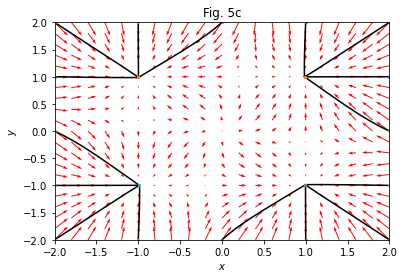

In [120]:
analyze(U=np.matrix([[2.9665, -0.4471],[0.4471, 2.9665]]), size=4, title_str='Fig. 5c')

[920.622949, 6608.640131, 5930.935964, 2402.282721, 920.622949, 6608.640131, 5930.935964, 2402.282721, 920.622949, 6608.640131, 5930.935964, 2402.282721, 920.622949, 6608.640131, 5930.935964, 2402.282721]


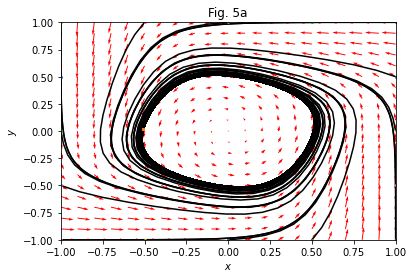

In [114]:
analyze(U=np.matrix([[1.5, -2.598],[2.598, 1.5]]), size=2, title_str='Fig. 5a')

## Cases where other parameters are non-zero

In [83]:
def sigma(x):
    return math.exp(-np.logaddexp(0, -x))

def get_r(Ur, h, br):
    v = np.matmul(Ur, h) + br
    return np.array([sigma(v[0, 0]), sigma(v[0, 1])])
    
def g(h, t, Uh, bh, Ur, br):  
    v = np.matmul(Uh, np.multiply(get_r(Ur, h, br), h)) + bh
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = -x + np.tanh(v0)
    ydot =  y + np.tanh(v1)
    
    return [xdot, ydot]

def draw_phase_portrait_2(Uh, bh, Ur, br, size, title_str = 'Phase portrait'):
    # Create the grid in the domain [-1, 1] x [-1, 1].
    lo, hi = -0.5*size, 0.5*size
    X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = g([X[i, j], Y[i, j]], 0, Uh, bh, Ur, br)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
    
    plt.title(title_str)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 50, 2000)  
        xs = odeint(g, x_init, times, args = (Uh, bh, Ur, br))
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 2) # end
        
def analyze_2(Uh, bh, Ur, br, size=1, title_str='Phase portrait'):
    draw_phase_portrait_2(Uh, bh, Ur, br, size, title_str)
    x_finals = []
    
    for x_init in list_mul_2d(x_inits, size):  
            times = np.linspace(0, 5, 2000)  
            xs = odeint(g, x_init, times, args = (Uh, bh, Ur, br))
            x_finals.append(xs)

    x_final_distances = [eu_dist(np.array(x_finals[i-1]), np.array(x_finals[i])) for i in range(len(x_finals))] 
    
    ratios = [round(x_final_distances[i]/x_init_distances[i], 6) for i in range(len(x_init_distances))]
    print(ratios)

[86175.740031, 8121.937274, 8776.225631, 8886.412085, 8636.114579, 83526.446699, 184342.46592, 39836.298275, 17684.309674, 1896.492567, 2004.119439, 2115.695562, 2230.866917, 18874.611654, 46885.852729, 214490.092274]


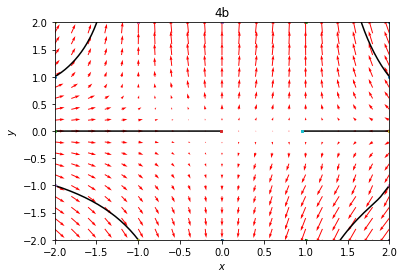

In [84]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[5, 9], [9, 5]])
bh = np.array([0, 0])
br = np.array([0, 0])
analyze_2(Uh, bh, Ur, br, 4, title_str = '4b')

[91252.651895, 4052.549567, 4909.570406, 4817.187574, 4010.666747, 91109.457285, 211068.150822, 31045.372202, 13738.383342, 750.158865, 783.404291, 818.651399, 855.94682, 14155.272802, 33817.199072, 225279.167632]


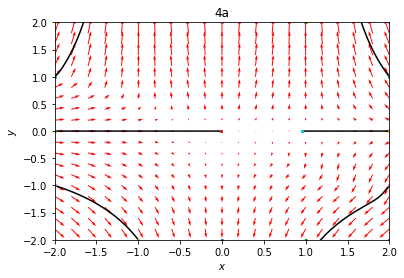

In [85]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[5, 9], [5, 9]])
bh = np.array([0, 0])
br = np.array([0, 0])
analyze_2(Uh, bh, Ur, br, 4, title_str = '4a')

[56444.92397, 2746.824086, 2673.383867, 2600.069061, 2527.103444, 53761.340884, 74615.635548, 31100.80076, 20907.562846, 1315.16094, 1398.203965, 1489.043202, 1588.733172, 22831.858755, 34872.971207, 82440.690129]


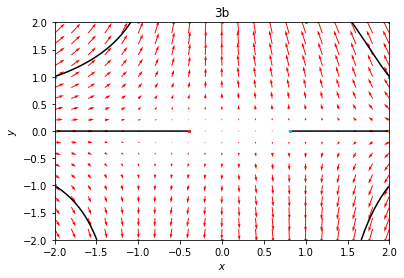

In [86]:
Uh = np.matrix([[2, 0], [0, 2]])
Ur = np.matrix([[1, -2], [3, 1]])
bh = np.array([-0.06, 0])
br = np.array([0.2, -0.85])
analyze_2(Uh, bh, Ur, br, 4, title_str = '3b')

[47.597544, 56.627227, 56.627215, 56.627233, 56.627219, 47.636961, 46.468276, 45.305546, 44.147797, 56.627347, 56.627501, 56.627588, 56.627424, 44.106512, 45.264913, 46.428269]


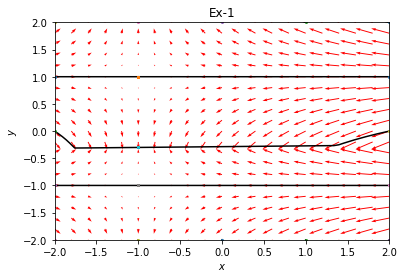

In [95]:
Uh = np.matrix([[7, -100], [10, -700]])
Ur = np.matrix([[0, 0], [0, 0]])
bh = np.array([-100, -100])
br = np.array([0, 0])
analyze_2(Uh, bh, Ur, br, 4, title_str = 'Ex-1')